# Energy Economics Final Project #

## Hypothesis 1: ##
There is a negative relationship, the more expensive oil is, the less Americans hold enviornmental issues at hand

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot  as plt
plt.style.use("ggplot")
import scipy.stats
from scipy.stats import linregress

## Cleaning Data Climate\Oil Price ##

### Climate ####

In [2]:
df = pd.read_csv("Climate_1989-2023.csv")

In [3]:
df = df.rename(columns={'Global warming or climate change': 'Year'})

In [4]:
df.columns

Index(['Year', 'Great Deal', 'Fair Amount', 'Only a little', 'Not at all',
       'No opinion', 'Totals'],
      dtype='object')

In [5]:
df = df[['Year', 'Great Deal', 'Fair Amount',
       'Only a little', 'Not at all', 'No opinion']]

In [6]:
df.loc[:, 'Year'] = df['Year'].str[:-6]
#This was able to work because the : operator was able to indice and slice everything that was at the end of the string

In [7]:
df["Year"] = df['Year'].str.replace("M"," ")
df["Year"] = df['Year'].str.replace("M"," ")
df["Year"] = df['Year'].str.replace("Apr"," ")
df["Year"] = df['Year'].str.replace("Oct"," ")
df['Year'] = df['Year'].str.replace("Mar"," ")
df['Year'] = df['Year'].str.replace("A"," ")
df['Year'] = df['Year'].str.replace("r"," ")
df['Year'] = df['Year'].str.replace("a"," ")

In [8]:
df['Support_Env'] = df['Great Deal'] + df['Fair Amount']

In [9]:
df['Oppose_Env'] = df['Only a little'] + df['Not at all']

In [10]:
df = df[['Year','Support_Env', 'Oppose_Env']]
df["Year"].dtype

dtype('O')

### Oil Price ###

In [11]:
df2 = pd.read_csv("crude-oil-prices.csv")

In [12]:
df["Year"] = df["Year"].astype("int64")

In [13]:
df2 = df2.rename(columns={'Oil price - Crude prices since 1861 (current US$)': 'Price'})

In [14]:
df.columns

Index(['Year', 'Support_Env', 'Oppose_Env'], dtype='object')

In [15]:
df2 = df2[["Year", "Price"]]

In [16]:
df2 = df2[-34:]

In [287]:
#df2 = display(df2[df2.columns[::-2]])

In [20]:
df.head(5)

,Year,Support_Env,Oppose_Env
28,1989,63,30
27,1990,57,36
26,1991,62,34
25,1997,50,46
24,1999,59,39


In [19]:
#df2 =  df2.iloc[::-1] #this helps reverse the rows in the columns
df =  df.iloc[::-1] 

## Data Analysis ##

In [22]:
#merge_df.head(20)

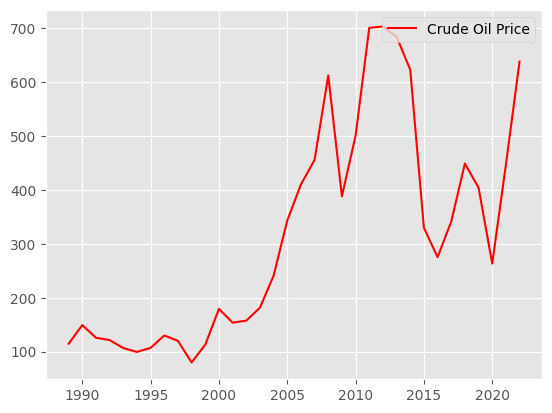

In [23]:
plt.plot( df2["Year"], df2["Price"], color='red',label='Crude Oil Price')
plt.legend(loc='upper right', fontsize='10')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

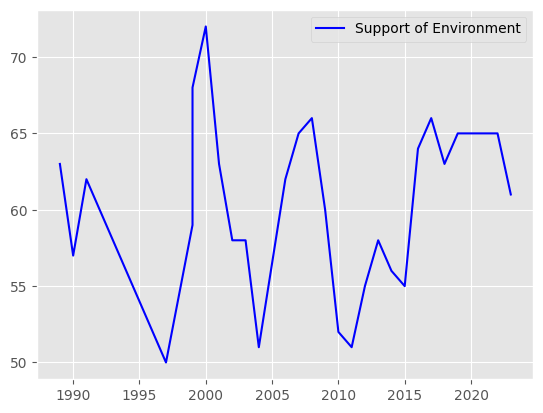

In [139]:
plt.plot( df["Year"], df["Support_Env"], color='blue',label='Support of Environment')
plt.legend(loc='upper right', fontsize='10')
#plt.xticks(rotation=45)
plt.show

In [25]:
df['Support_Env'] = df['Support_Env'].astype(float)
print(df["Support_Env"].dtype)
print(df2["Price"].dtype)

float64
float64


In [26]:
df.head(10)

,Year,Support_Env,Oppose_Env
28,1989,63.0,30
27,1990,57.0,36
26,1991,62.0,34
25,1997,50.0,46
24,1999,59.0,39
23,1999,68.0,30
22,2000,72.0,27
21,2001,63.0,35
20,2002,58.0,40
19,2003,58.0,40


In [135]:
merge_df = pd.merge(df, df2, on='Year')

In [46]:
slope, intercept, r_value, p_value, std_err = linregress(merge_df['Support_Env'], merge_df['Price'])
trendline = slope * merge_df['Support_Env'] + intercept

In [85]:
merge_df['Support_Env'].mean()

60.5

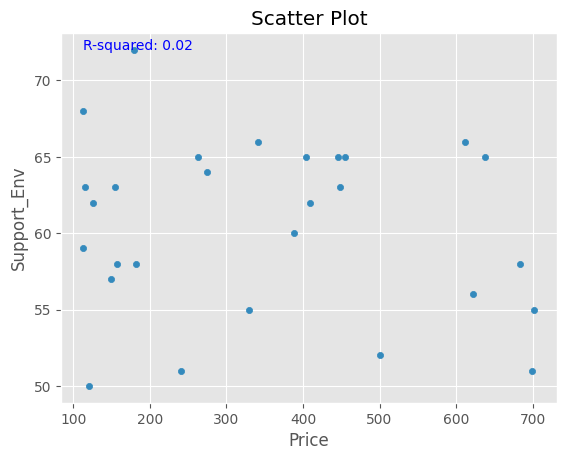

In [126]:
scatter = merge_df.plot.scatter(x ='Price', y = 'Support_Env', title='Scatter Plot')
plt.text(merge_df['Price'].min(), merge_df['Support_Env'].max(), f'R-squared: {r_value**2:.2f}', fontsize=10, color='blue', ha = 'left')
plt.show()

In [132]:
#X values is the price variable in the merge_df
# while the Y values is the share of support in the merge_df
slope, intercept, r_value, p_value, std_err = linregress(merge_df['Price'], merge_df['Support_Env'])
equation = f"y = {slope:.2f}x + {intercept:.2f}"
print(equation)

y = -0.00x + 62.00


In [134]:
print(p_value)
print(r_value)
print(slope)

0.43811427737645625
-0.15263039817824592
-0.004249812204802418


## Linear Regression and Results ##


This was the found linear expression when comparing oil price between the years of 1989-2022 and share of Enviornmental support between the years of 1989-2022
- Linear Regression = Y = -0.00x + 62.00
- P_value = 0.43
- R = -0.15
- Slope = -0.004

The findings find a lack of evidence to support the claim that oil price will affect the support of enviornment in the United States. 

## Hypothesis 2: ###
Oil Lobbying Contributions: The more contributions towards oil lobbying firms give, the less the public advocates for enviornmental rights. 